In [1]:
# This tutorial will briefly show the how to build a DMDc model from the aerodynamic data.
# We will create the database, create the physical model, and finally use them to obtain the ROM.
# We will then plot the eigenvalues of the aerodynamic system, to study how the system evolve.
# After the completion of this tutorial you should be able to obtain a surrogate model from high-fidelity
# aerodynamics, that can be used to reproduce and interpret the full-simulation

In [2]:
# We will assume the completion of tutorial 1 in the following. Here we call the main functions of tutorial 1 that
# are required to proceed

import os
os.chdir("..")
import aerodynamics
os.chdir("Tutorials")

stru_history = "data/blendedStep/StructHistoryModal.dat"
aero_history = "data/blendedStep/surface_flow.csv"

database = aerodynamics.database(stru_history,aero_history)
model = aerodynamics.physicalModel("data/Modes/Normals.csv","data/Modes/Mode.csv")

Creating the database for the reduced order model.
Importing the data from the files.
Opened structural history file /mnt/d/Desktop/PhD/pysu2DMD/blendedStep/StructHistoryModal.dat.
Completed reading
Starting the reading of surface_flow.csv files.
Opened time iter 199, last time iter is 1099
Opened time iter 200, last time iter is 1099
Opened time iter 201, last time iter is 1099
Opened time iter 202, last time iter is 1099
Opened time iter 203, last time iter is 1099
Opened time iter 204, last time iter is 1099
Opened time iter 205, last time iter is 1099
Opened time iter 206, last time iter is 1099
Opened time iter 207, last time iter is 1099
Opened time iter 208, last time iter is 1099
Opened time iter 209, last time iter is 1099
Opened time iter 210, last time iter is 1099
Opened time iter 211, last time iter is 1099
Opened time iter 212, last time iter is 1099
Opened time iter 213, last time iter is 1099
Opened time iter 214, last time iter is 1099
Opened time iter 215, last time i

Opened time iter 376, last time iter is 1099
Opened time iter 377, last time iter is 1099
Opened time iter 378, last time iter is 1099
Opened time iter 379, last time iter is 1099
Opened time iter 380, last time iter is 1099
Opened time iter 381, last time iter is 1099
Opened time iter 382, last time iter is 1099
Opened time iter 383, last time iter is 1099
Opened time iter 384, last time iter is 1099
Opened time iter 385, last time iter is 1099
Opened time iter 386, last time iter is 1099
Opened time iter 387, last time iter is 1099
Opened time iter 388, last time iter is 1099
Opened time iter 389, last time iter is 1099
Opened time iter 390, last time iter is 1099
Opened time iter 391, last time iter is 1099
Opened time iter 392, last time iter is 1099
Opened time iter 393, last time iter is 1099
Opened time iter 394, last time iter is 1099
Opened time iter 395, last time iter is 1099
Opened time iter 396, last time iter is 1099
Opened time iter 397, last time iter is 1099
Opened tim

Opened time iter 559, last time iter is 1099
Opened time iter 560, last time iter is 1099
Opened time iter 561, last time iter is 1099
Opened time iter 562, last time iter is 1099
Opened time iter 563, last time iter is 1099
Opened time iter 564, last time iter is 1099
Opened time iter 565, last time iter is 1099
Opened time iter 566, last time iter is 1099
Opened time iter 567, last time iter is 1099
Opened time iter 568, last time iter is 1099
Opened time iter 569, last time iter is 1099
Opened time iter 570, last time iter is 1099
Opened time iter 571, last time iter is 1099
Opened time iter 572, last time iter is 1099
Opened time iter 573, last time iter is 1099
Opened time iter 574, last time iter is 1099
Opened time iter 575, last time iter is 1099
Opened time iter 576, last time iter is 1099
Opened time iter 577, last time iter is 1099
Opened time iter 578, last time iter is 1099
Opened time iter 579, last time iter is 1099
Opened time iter 580, last time iter is 1099
Opened tim

Opened time iter 742, last time iter is 1099
Opened time iter 743, last time iter is 1099
Opened time iter 744, last time iter is 1099
Opened time iter 745, last time iter is 1099
Opened time iter 746, last time iter is 1099
Opened time iter 747, last time iter is 1099
Opened time iter 748, last time iter is 1099
Opened time iter 749, last time iter is 1099
Opened time iter 750, last time iter is 1099
Opened time iter 751, last time iter is 1099
Opened time iter 752, last time iter is 1099
Opened time iter 753, last time iter is 1099
Opened time iter 754, last time iter is 1099
Opened time iter 755, last time iter is 1099
Opened time iter 756, last time iter is 1099
Opened time iter 757, last time iter is 1099
Opened time iter 758, last time iter is 1099
Opened time iter 759, last time iter is 1099
Opened time iter 760, last time iter is 1099
Opened time iter 761, last time iter is 1099
Opened time iter 762, last time iter is 1099
Opened time iter 763, last time iter is 1099
Opened tim

Opened time iter 925, last time iter is 1099
Opened time iter 926, last time iter is 1099
Opened time iter 927, last time iter is 1099
Opened time iter 928, last time iter is 1099
Opened time iter 929, last time iter is 1099
Opened time iter 930, last time iter is 1099
Opened time iter 931, last time iter is 1099
Opened time iter 932, last time iter is 1099
Opened time iter 933, last time iter is 1099
Opened time iter 934, last time iter is 1099
Opened time iter 935, last time iter is 1099
Opened time iter 936, last time iter is 1099
Opened time iter 937, last time iter is 1099
Opened time iter 938, last time iter is 1099
Opened time iter 939, last time iter is 1099
Opened time iter 940, last time iter is 1099
Opened time iter 941, last time iter is 1099
Opened time iter 942, last time iter is 1099
Opened time iter 943, last time iter is 1099
Opened time iter 944, last time iter is 1099
Opened time iter 945, last time iter is 1099
Opened time iter 946, last time iter is 1099
Opened tim

Opened file 2 of 2
Completed reading
Done


In [3]:
# The creation of the rom is a simple one-line statement. 
rom = aerodynamics.ROM([database], model)
# This contains the matrices A and B that are used
# to advance the system in time following x^n+1 = Ax^n + Bu^n

In [4]:
# We can now perform an eigenvalue analysis of the A matrix to obtain the DMD aerodynamic modes.
import numpy as np
w, v = np.linalg.eig(rom.A)

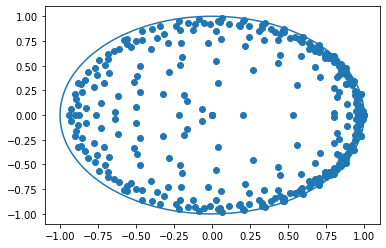

In [5]:
# It is of great interest to capture the first modes and their eigenvalues, to understand the physics
import matplotlib.pyplot as plt
import math
plt.scatter(w.real,w.imag)

# The system stability is determined by the eigenvalues, they should be inside the unit circle
theta = np.linspace(0,2*math.pi,200)
x = np.cos(theta)
y = np.sin(theta)
plt.plot(x,y)

In [7]:
# The first sanity check that we can perform is to reproduce the training data

# We set the initial condition of the ROM (it is automatically set to the last snapshot, so we need to change it)
rom._ROM__setInitialCondition(database.X[:,0].reshape((database.X.shape[0], 1)))

lift = np.empty((0))
aeroState = np.empty((database.X.shape[0], 0))
# Then we iterate for the number of total time iterations, providing to the rom the same inputs of the full model
for i in range(len(database.timeIter)):
    print("Time iteration {} of {}".format(i+1,len(database.timeIter)))
    
    # With the predict function we compute the new time level aerodynamic state. It also provides as input the corresponding
    # modal forces. It receives as input the structural modal amplitudes.
    aeroState = np.append(aeroState, rom.predict(database.U[:,i], database.Udot[:,i], 
                                                 database.Uddot[:,i]).reshape(database.X.shape[0], 1), axis=1)
    aeroLift = rom.getLift()
    
    # With the update function, we advance the state inside the class ROM
    rom.update()
    
    # We can also access the new state as rom.X. Please remember that this is the reduced state, thus in order to get
    # the full one we must multiply for the PODs of the physical state and add the mean flow.
    # If we directly pass this full state to the physical model we can again obtain the lift.
    lift = np.append(lift, model.getCl(rom.Up.dot(rom.X)+rom.Xmean))
    
# The lift computed in the two ways is equivalent, the direct way (using the model) is only shown for explanation
# purposes. Indeed, the two lifts are (for the last state):
print("Lift 1 is {}, while Lift 2 is {}".format(aeroLift, model.getCl(rom.Up.dot(rom.X)+rom.Xmean)))

Time iteration 1 of 901
Time iteration 2 of 901
Time iteration 3 of 901
Time iteration 4 of 901
Time iteration 5 of 901
Time iteration 6 of 901
Time iteration 7 of 901
Time iteration 8 of 901
Time iteration 9 of 901
Time iteration 10 of 901
Time iteration 11 of 901
Time iteration 12 of 901
Time iteration 13 of 901
Time iteration 14 of 901
Time iteration 15 of 901
Time iteration 16 of 901
Time iteration 17 of 901
Time iteration 18 of 901
Time iteration 19 of 901
Time iteration 20 of 901
Time iteration 21 of 901
Time iteration 22 of 901
Time iteration 23 of 901
Time iteration 24 of 901
Time iteration 25 of 901
Time iteration 26 of 901
Time iteration 27 of 901
Time iteration 28 of 901
Time iteration 29 of 901
Time iteration 30 of 901
Time iteration 31 of 901
Time iteration 32 of 901
Time iteration 33 of 901
Time iteration 34 of 901
Time iteration 35 of 901
Time iteration 36 of 901
Time iteration 37 of 901
Time iteration 38 of 901
Time iteration 39 of 901
Time iteration 40 of 901
Time iter

Time iteration 321 of 901
Time iteration 322 of 901
Time iteration 323 of 901
Time iteration 324 of 901
Time iteration 325 of 901
Time iteration 326 of 901
Time iteration 327 of 901
Time iteration 328 of 901
Time iteration 329 of 901
Time iteration 330 of 901
Time iteration 331 of 901
Time iteration 332 of 901
Time iteration 333 of 901
Time iteration 334 of 901
Time iteration 335 of 901
Time iteration 336 of 901
Time iteration 337 of 901
Time iteration 338 of 901
Time iteration 339 of 901
Time iteration 340 of 901
Time iteration 341 of 901
Time iteration 342 of 901
Time iteration 343 of 901
Time iteration 344 of 901
Time iteration 345 of 901
Time iteration 346 of 901
Time iteration 347 of 901
Time iteration 348 of 901
Time iteration 349 of 901
Time iteration 350 of 901
Time iteration 351 of 901
Time iteration 352 of 901
Time iteration 353 of 901
Time iteration 354 of 901
Time iteration 355 of 901
Time iteration 356 of 901
Time iteration 357 of 901
Time iteration 358 of 901
Time iterati

Time iteration 637 of 901
Time iteration 638 of 901
Time iteration 639 of 901
Time iteration 640 of 901
Time iteration 641 of 901
Time iteration 642 of 901
Time iteration 643 of 901
Time iteration 644 of 901
Time iteration 645 of 901
Time iteration 646 of 901
Time iteration 647 of 901
Time iteration 648 of 901
Time iteration 649 of 901
Time iteration 650 of 901
Time iteration 651 of 901
Time iteration 652 of 901
Time iteration 653 of 901
Time iteration 654 of 901
Time iteration 655 of 901
Time iteration 656 of 901
Time iteration 657 of 901
Time iteration 658 of 901
Time iteration 659 of 901
Time iteration 660 of 901
Time iteration 661 of 901
Time iteration 662 of 901
Time iteration 663 of 901
Time iteration 664 of 901
Time iteration 665 of 901
Time iteration 666 of 901
Time iteration 667 of 901
Time iteration 668 of 901
Time iteration 669 of 901
Time iteration 670 of 901
Time iteration 671 of 901
Time iteration 672 of 901
Time iteration 673 of 901
Time iteration 674 of 901
Time iterati

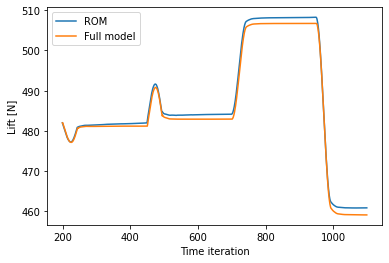

In [8]:
# We can then compute the same quantities as for tutorial 1 as a reference
lift_ref = []

for i in range(len(database.timeIter)):
    lift_ref = np.append(lift_ref, model.getCl(database.X[:,i]))

import matplotlib.pyplot as plt
plt.plot(database.timeIter, lift)
plt.plot(database.timeIter, lift_ref)
# just make the plot pretty
plt.xlabel("Time iteration")
plt.ylabel("Lift [N]")
plt.legend(["ROM","Full model"])

In [9]:
# We can see that the match is very nice. There is a slow drift given by a couple of unsteady egeinvalues. This must
# be solved with a stabilisation procedure, discussed in the following tutorial.

Text(0.5, 1.0, 'DMD')

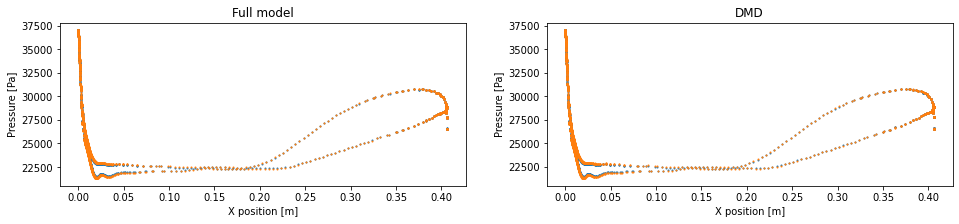

In [15]:
# It is also of interest to understand if not only we can reproduce the global performance indices, like the lift,
# but also the microscopic behaviour, as the pressure distribution. This is of paramount importance as most of the
# model available at the moment, like ARMAX, MIMO ARMAX, Impulse transfer function analysis, they all focus on the
# surrogate modeling of the input-output relation, missing the state evolution details. With our models, you are able
# to study the details of pressure behaviour, that eventually leads to the global performance indices.

# The data we want must be extracted for a y value of 0.1 m
# We first find the index of time step 700 and 730
index700 = database.timeIter == 700
index730 = database.timeIter == 730

# We now extract the vertices close to y = 0.1 m (1 cm close)
undeformedx = np.empty((0))
undeformedy = np.empty((0))
for i in range(len(model.undeformedShape)):
    undeformedx = np.append(undeformedx, model.undeformedShape[i].ux)
    undeformedy = np.append(undeformedy, model.undeformedShape[i].uy)
    
positionx = undeformedx[(undeformedy < 0.11) & (undeformedy > 0.09)]
pressure700_ref = database.X[(undeformedy < 0.11) & (undeformedy > 0.09), index700]
pressure730_ref = database.X[(undeformedy < 0.11) & (undeformedy > 0.09), index730]
pressure700 = aeroState[(undeformedy < 0.11) & (undeformedy > 0.09), index700]
pressure730 = aeroState[(undeformedy < 0.11) & (undeformedy > 0.09), index730]
   
plt.figure(figsize=(16,3))

# In blue we will have the distribution before pitching, in orange after

plt.subplot(1,2,1)
plt.scatter(positionx, pressure700_ref, marker='o', s=1)
plt.scatter(positionx, pressure730_ref, marker='o', s=1)
plt.xlabel("X position [m]")
plt.ylabel("Pressure [Pa]")
plt.title("Full model")

plt.subplot(1,2,2)
plt.scatter(positionx, pressure700, marker='o', s=1)
plt.scatter(positionx, pressure730, marker='o', s=1)
plt.xlabel("X position [m]")
plt.ylabel("Pressure [Pa]")
plt.title("DMD")

# We can see that the pitch input is actually very small, but due to the transonic conditions the change the input should
# be limited to the linear region nearby the linearisation point. However, the DMD model can actually represent very nicely
# the pressure distribution, which is a novelty in the field.

In [20]:
# Finally, we can compute the percentage error in the reconstruction of this surface distribution
print(np.linalg.norm((pressure700 - pressure700_ref)/pressure700_ref)*100)

1.0415117266237037
